In [ ]:
import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"/content/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.shape

(200, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.duplicated().sum()#checking duplicate values

0

<Axes: ylabel='TV'>

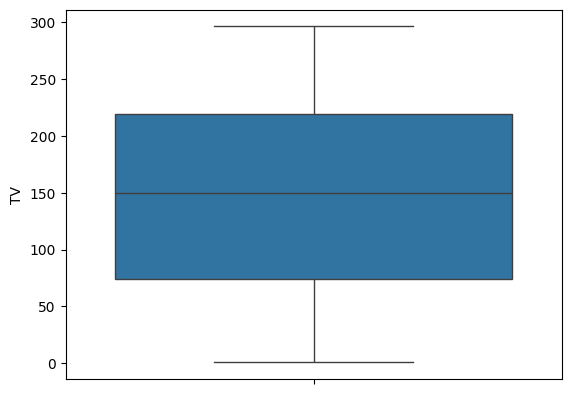

In [ ]:
sns.boxplot(df['TV'])

<Axes: ylabel='Newspaper'>

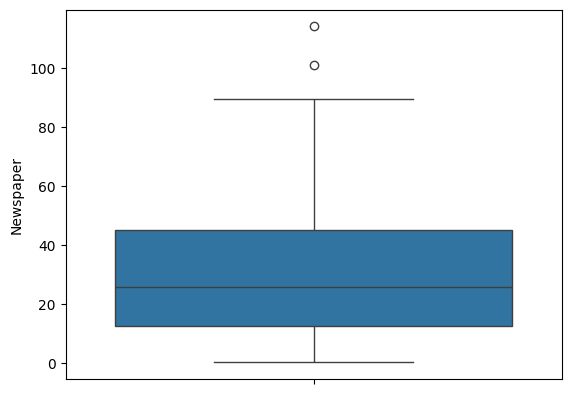

In [ ]:
sns.boxplot(df['Newspaper'])

<Axes: ylabel='Radio'>

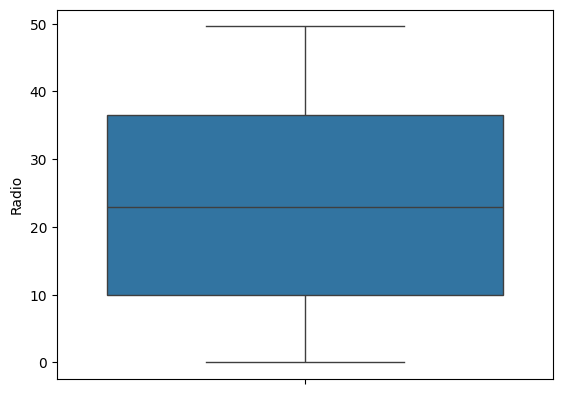

In [ ]:
sns.boxplot(df['Radio'])

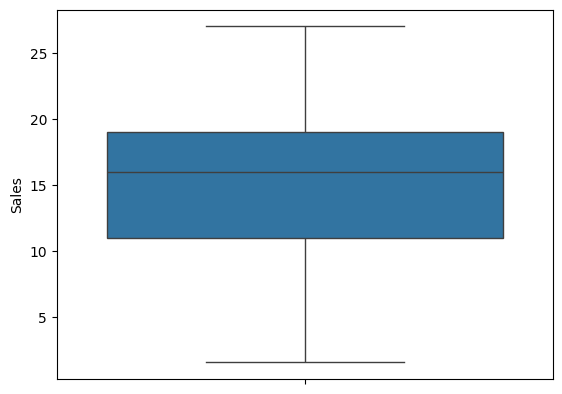

In [ ]:
sns.boxplot(df['Sales'])
plt.show()

<Axes: xlabel='Newspaper', ylabel='Sales'>

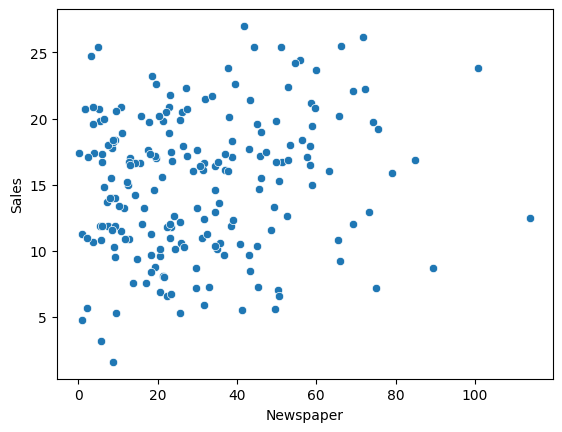

In [ ]:
sns.scatterplot(x=df['Newspaper'],y=df['Sales'])

<Axes: xlabel='Radio', ylabel='Sales'>

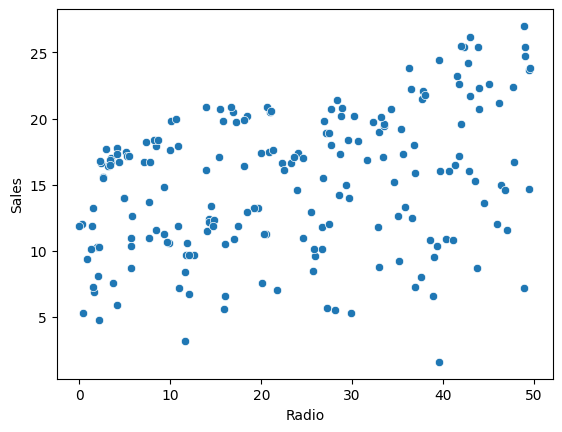

In [ ]:
sns.scatterplot(x=df['Radio'],y=df['Sales'])

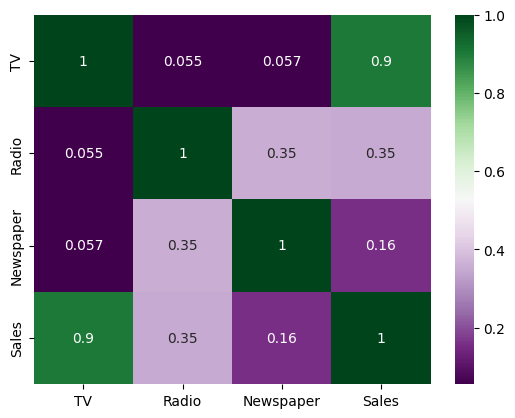

In [ ]:
sns.heatmap(df.corr(), cmap="PRGn", annot = True)
plt.show()

In [ ]:
x =df.drop(['Sales'],axis=1)
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
y=df['Sales']
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
x_train.head()

,TV,Radio,Newspaper
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
26,142.9,29.3,12.6
90,134.3,4.9,9.3


In [ ]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_model=LinearRegression()

In [ ]:
reg_model.fit(x_train,y_train)

In [ ]:
y_predict = reg_model.predict(x_train)

In [ ]:
from sklearn import metrics

In [ ]:
reg_model.score(x_train, y_train)

0.91049938193816

In [ ]:
r_square=metrics.r2_score(y_train,y_predict)
print('R-square error for decision tree regressor is:',round(100*(r_square),3))

R-square error for decision tree regressor is: 91.05


In [ ]:
from sklearn.tree import DecisionTreeRegressor
#Calling DecisionTreeRegressor with max_depth as 3 and calling it to dt.
dt= DecisionTreeRegressor(max_depth=3)

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
print(dt.score(x_train, y_train))

0.9237579359310554


In [ ]:
yd_predict = dt.predict(x_train)

In [ ]:

r_square=metrics.r2_score(y_train,yd_predict)
print('R-square error for decision tree regressor is:',round(100*(r_square),3))

R-square error for decision tree regressor is: 92.376


In [ ]:
#importing Random forest regressor from sklearn.ensemble and it to rfr with random_state 5 and fitting it to X_t
from sklearn.ensemble import RandomForestRegressor
#importing metrices from sklearn library
from sklearn import metrics
rfr =RandomForestRegressor(random_state=5)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=5)

In [ ]:
print(rfr.score(x_train, y_train))

0.9916386982783094


In [ ]:
y1_pred =rfr.predict(x_train)

In [ ]:
r_square=metrics.r2_score(y_train,y1_pred)
print('R-square error for decision tree regressor is:',round(100*(r_square),3))

R-square error for decision tree regressor is: 99.164
